### Aisya Mufidah Najwa (1206230026)
### Inaya Revalina P.M (1206230038)
### Mochammad Fery A (1206230044)

## Formulasi Masalah

Setiap perusahaan yang bergerak di bidang ritel atau layanan konsumen menghadapi tantangan dalam memahami karakteristik dan perilaku pelanggan yang beragam. Tanpa adanya segmentasi yang tepat, strategi pemasaran, penyusunan promosi, dan pengembangan produk dapat menjadi kurang efektif serta tidak tepat sasaran. Salah satu cara untuk memahami perbedaan karakteristik pelanggan adalah dengan melakukan segmentasi berdasarkan atribut-atribut tertentu seperti umur, pendapatan tahunan, dan tingkat pengeluaran.

Namun, dalam kenyataannya, hubungan antara variabel-variabel tersebut tidak selalu bersifat linear atau intuitif. Misalnya, tidak semua pelanggan dengan pendapatan tinggi memiliki tingkat pengeluaran yang tinggi, dan tidak semua pelanggan muda bersifat konsumtif. Oleh karena itu, diperlukan metode analisis yang mampu mengelompokkan pelanggan ke dalam klaster yang memiliki kemiripan pola perilaku berdasarkan data yang tersedia.

Permasalahan utama yang akan diselesaikan dalam penelitian ini adalah:

- Bagaimana mengelompokkan pelanggan ke dalam beberapa segmen atau klaster berdasarkan atribut-atribut numerik (seperti umur, pendapatan tahunan, dan spending score)?

- Berapa jumlah klaster yang optimal agar hasil segmentasi dapat merepresentasikan pola perilaku pelanggan secara bermakna?

- Apa karakteristik dari masing-masing klaster yang terbentuk, dan bagaimana insight yang dihasilkan dapat dimanfaatkan untuk mendukung pengambilan keputusan bisnis?

Penelitian ini juga bertujuan untuk memahami dan mengimplementasikan algoritma K-Means Clustering secara manual tanpa menggunakan library bawaan, guna memperdalam pemahaman mengenai proses iteratif dalam pembentukan klaster, pemilihan centroid, serta evaluasi hasil clustering melalui metrik seperti Silhouette Score dan Davies-Bouldin Index.

Dengan menggunakan metode unsupervised learning berupa algoritma K-Means Clustering, diharapkan dapat ditemukan pola segmentasi pelanggan yang dapat membantu perusahaan dalam merancang strategi pemasaran yang lebih efektif dan terarah.


Dataset diunduh dari Kaggle, berisi kolom:
- CustomerID
- Gender
- Age
- Annual Income (k$)
- Spending Score (1–100)

Link dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

## Eksplorasi dan Persiapan Data

Memeriksa distribusi variabel (pendapatan tahunan dan skor belanja).
Menghitung statistik deskriptif (mean, median, standar deviasi) untuk memahami karakteristik demografis dan perilaku pelanggan.
Visualisasi hubungan antar variabel menggunakan scatter plot untuk melihat pola dan keterkaitan. Boxplot, dan korelasi. Histogram dan density plot untuk melihat distribusi.

In [223]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import itertools
import math
import numpy as np
import random

In [224]:
!pip install kagglehub kaggle --quiet

import kagglehub

path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [193]:
csv_path = os.path.join(path, "Mall_Customers.csv")

df = pd.read_csv(csv_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [194]:
df.shape

(200, 5)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [196]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [197]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [198]:
df.duplicated().sum()

np.int64(0)

memeriksa distribusi variabel:

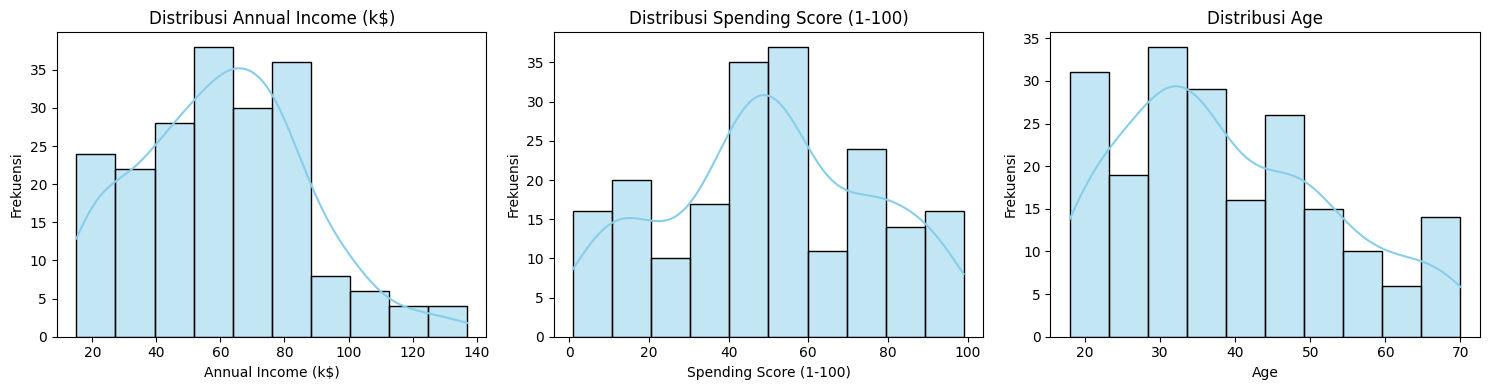

In [199]:
columns = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']

# Plot distribusi
plt.figure(figsize=(15, 4))
for i, col in enumerate(columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=10, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

cek distribusi normal:

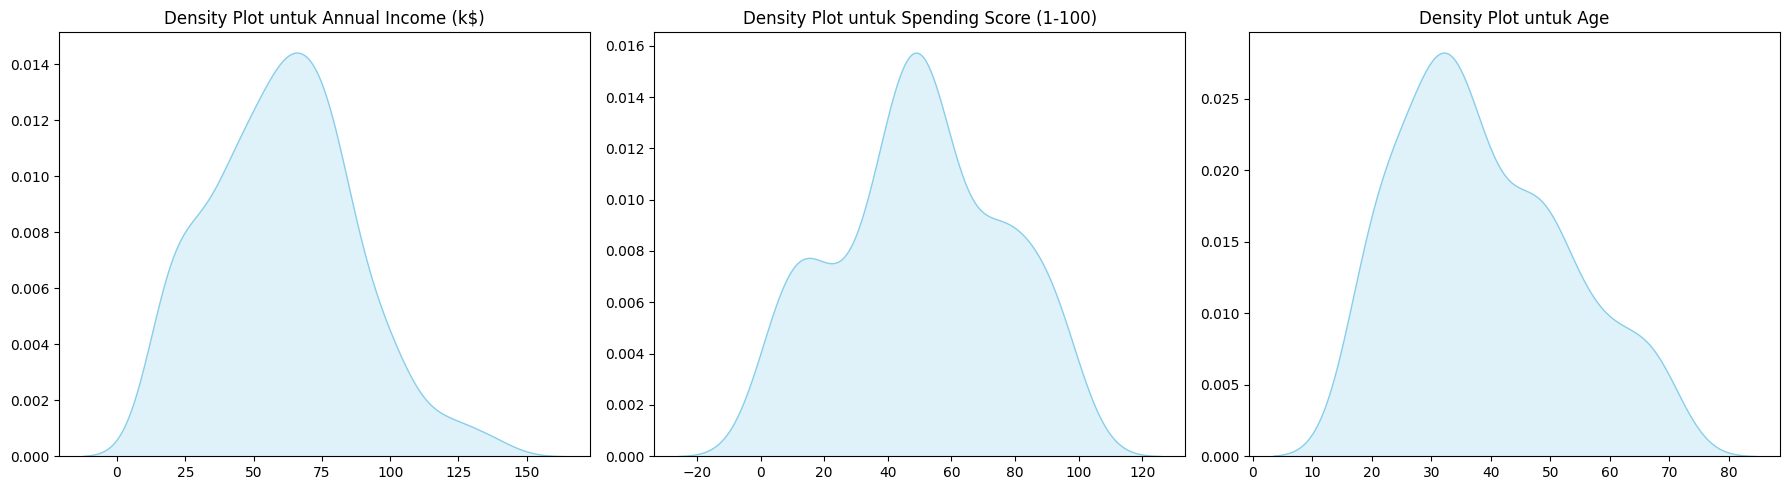

In [200]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

for i, col in enumerate(columns):
    sns.kdeplot(df[col], fill=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Density Plot untuk {col}')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

Density Plot menunjukkan distribusi:

Age relatif normal, sedikit skewed ke kanan.

Annual Income terlihat skewed dan memiliki outlier.

Spending Score hampir uniform, menyebar cukup merata dari 1–100.

Visualisasi hubungan antar variabel:

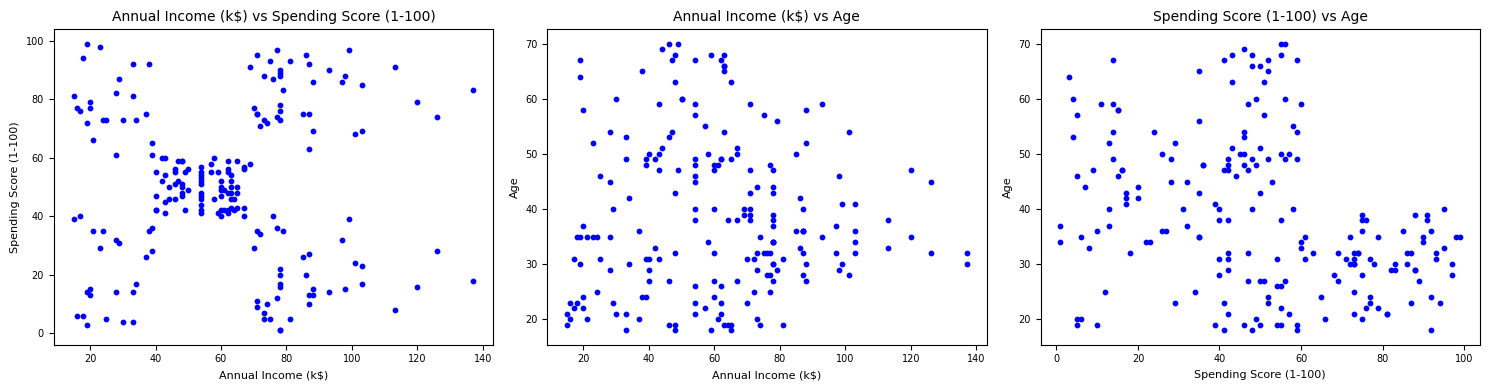

In [201]:
pairs = list(itertools.combinations(columns, 2))

n_plots = len(pairs)
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, (col_x, col_y) in enumerate(pairs):
    axes[i].scatter(df[col_x], df[col_y], color='blue', s=10)
    axes[i].set_title(f'{col_x} vs {col_y}', fontsize=10)
    axes[i].set_xlabel(col_x, fontsize=8)
    axes[i].set_ylabel(col_y, fontsize=8)
    axes[i].tick_params(axis='both', labelsize=7)

for j in range(len(pairs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Scatter plot antar fitur menunjukkan tidak ada hubungan linear yang jelas antar variabel, yang menegaskan bahwa pendekatan klasterisasi non-linear seperti K-Means cocok. Terdapat pola cluster yang jelas antara Annual Income dan Spending S


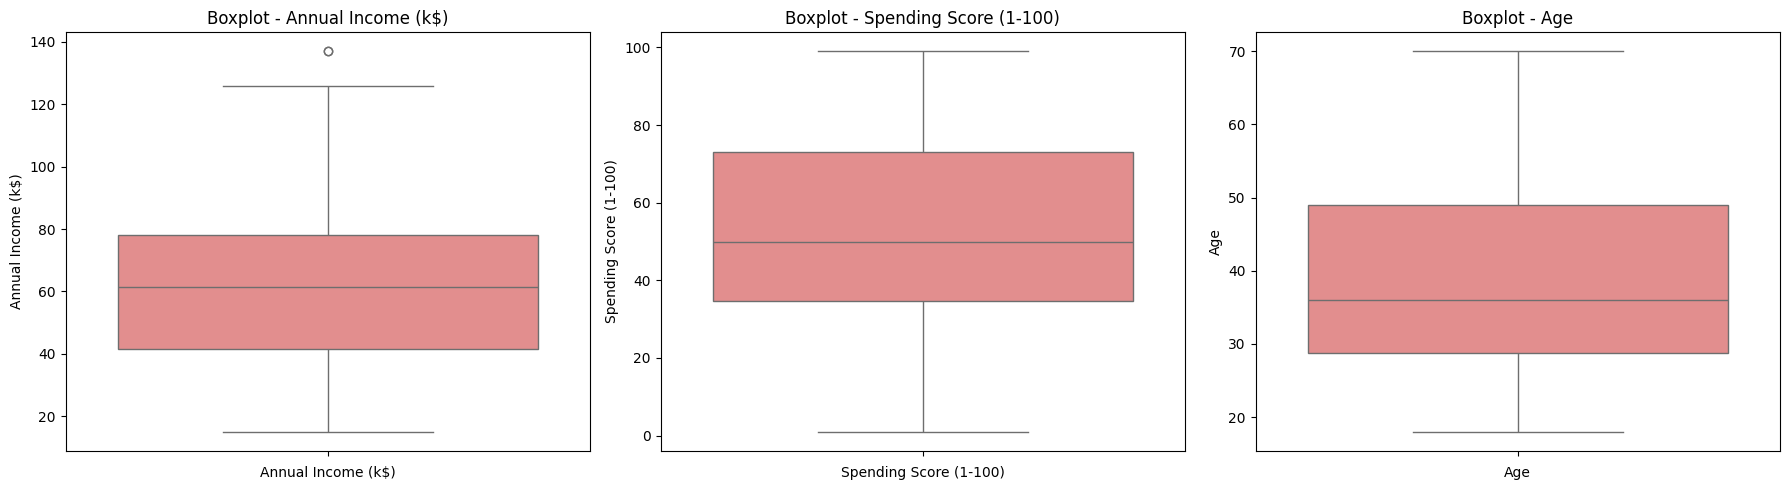

In [202]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, col in enumerate(columns):
    sns.boxplot(y=df[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Boxplot - {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

Minim outlier (hanya ada 1)

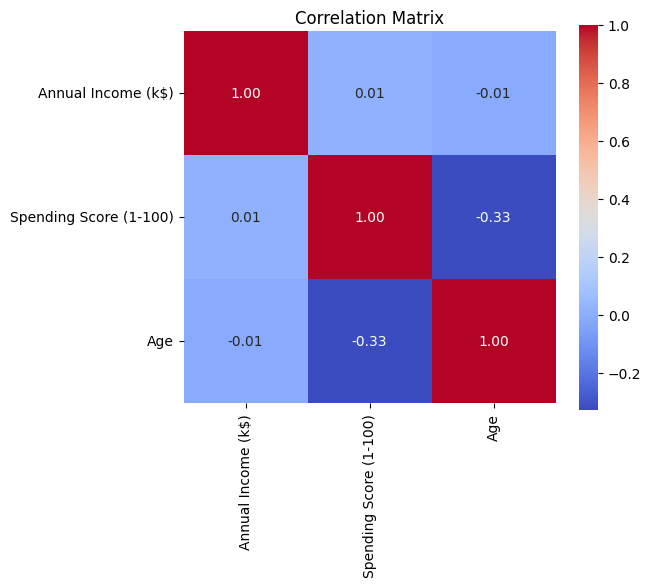

In [203]:
corr_matrix = df[columns].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()


Hasil Eksplorasi dan persiapan data:

Tiga fitur: Age, Annual Income, Spending Score.

Annual Income dan Spending Score sangat relevan untuk segmentasi pelanggan (customer segmentation).

Age bisa membantu mengidentifikasi segmen berdasarkan siklus hidup pelanggan (misalnya pelajar, dewasa muda, paruh baya).


Kami mencoba eksperimen clustering dengan:

- 2 fitur: Annual Income & Spending Score

- 3 fitur: Age, Annual Income, Spending Score.
Lalu membandingkan hasilnya.

- Membandingkan hasil clustering dengan dan tanpa standarisasi data

Alasan:

1. Scaling: K-Means menghitung jarak Euclidean antar data. Jika fitur memiliki skala berbeda, fitur dengan skala besar (misalnya Annual Income) akan mendominasi perhitungan jarak. Ini bisa menyebabkan pembentukan cluster yang bias.

2. Kombinasi Fitur:

-	Menggunakan ketiga fitur untuk melihat apakah memberikan cluster yang signifikan.
-	Mencoba 2 fitur: Anuual Income & Spending Score dipilih karena ada pola cluster yang jelas. (di scatterplot antar fitur)

Kami melakukan standarisasi karena fitur-fitur tersebut cukup simetris dan tidak ekstrem secara distribusi, dan standardisasi membuat kontribusi tiap fitur setara terhadap perhitungan jarak.

In [204]:
df_std = df.copy()

for col in columns:
    mean = df_std[col].mean()
    std = df_std[col].std()
    df_std[col] = (df_std[col] - mean) / std

df_std

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,-1.421003,-1.734646,-0.433713
1,2,Male,-1.277829,-1.734646,1.192711
2,3,Female,-1.349416,-1.696572,-1.711618
3,4,Female,-1.134655,-1.696572,1.037814
4,5,Female,-0.561958,-1.658498,-0.394989
...,...,...,...,...,...
195,196,Female,-0.275610,2.263112,1.115262
196,197,Female,0.440260,2.491555,-0.859681
197,198,Male,-0.490371,2.491555,0.921640
198,199,Male,-0.490371,2.910368,-1.246925


In [205]:
df_norm = df.copy()

for col in columns:
    min_val = df_norm[col].min()
    max_val = df_norm[col].max()
    df_norm[col] = (df_norm[col] - min_val) / (max_val - min_val)

df_norm

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,0.387755
1,2,Male,0.057692,0.000000,0.816327
2,3,Female,0.038462,0.008197,0.051020
3,4,Female,0.096154,0.008197,0.775510
4,5,Female,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,196,Female,0.326923,0.860656,0.795918
196,197,Female,0.519231,0.909836,0.275510
197,198,Male,0.269231,0.909836,0.744898
198,199,Male,0.269231,1.000000,0.173469


Kami mencoba normalisasi hanya untuk membandingkan

## Pemodelan (K-Means Manual)

Silhouette Score:

In [206]:
def silhouette_score(X, labels):
    n = X.shape[0]
    silhouette_vals = []

    for i in range(n):
        same_cluster = X[labels == labels[i]]
        other_clusters = [X[labels == j] for j in set(labels) if j != labels[i]]

        a = np.mean(np.linalg.norm(same_cluster - X[i], axis=1)) if len(same_cluster) > 1 else 0
        b = min([np.mean(np.linalg.norm(cluster - X[i], axis=1)) for cluster in other_clusters]) if other_clusters else 0

        s = (b - a) / max(a, b) if max(a, b) != 0 else 0
        silhouette_vals.append(s)

    return np.mean(silhouette_vals)

Davies-Bouldin Index:

In [207]:
def davies_bouldin_index(X, labels, centroids):
    k = len(np.unique(labels))
    cluster_sigs = []
    for i in range(k):
        cluster_points = X[labels == i]
        sig_i = np.mean(np.linalg.norm(cluster_points - centroids[i], axis=1))
        cluster_sigs.append(sig_i)

    dbi = 0
    for i in range(k):
        max_rij = 0
        for j in range(k):
            if i != j:
                rij = (cluster_sigs[i] + cluster_sigs[j]) / np.linalg.norm(centroids[i] - centroids[j])
                max_rij = max(max_rij, rij)
        dbi += max_rij
    return dbi / k


K-means Manual:

In [208]:
# Fungsi jarak Euclidean manual defaultdict
def euclidean_distance(p1, p2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(p1, p2)))

# Set seed random
def set_seed(seed=42):
    np.random.seed(seed)
    random.seed(seed)

# Inisialisasi centroid acak
def init_centroids(X, k):
    idx = np.random.choice(X.shape[0], k, replace=False)
    return X[idx]

# Assign cluster secara manual dengan euclidean_distance
def assign_clusters(X, centroids):
    labels = []
    for point in X:
        dists = [euclidean_distance(point, centroid) for centroid in centroids]
        labels.append(dists.index(min(dists)))
    return np.array(labels)

# Update centroid berdasarkan rata-rata
def update_centroids(X, labels, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) == 0:
            new_centroids.append(X[np.random.randint(len(X))])
        else:
            new_centroids.append(np.mean(cluster_points, axis=0))
    return np.array(new_centroids)

# Fungsi utama K-Means
def kmeans(X, k, max_iter=100, seed=42):
    set_seed(seed)
    centroids = init_centroids(X, k)
    for _ in range(max_iter):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids


Mencari k optimal:

In [209]:
def find_optimal_k(X, k_min=2, k_max=10, seed=42):
    k_values = range(k_min, k_max + 1)
    sil_scores = []
    dbi_scores = []

    for k in k_values:
        labels_k, centroids_k = kmeans(X, k, seed=seed)
        sil = silhouette_score(X, labels_k)
        dbi = davies_bouldin_index(X, labels_k, centroids_k)
        sil_scores.append(sil)
        dbi_scores.append(dbi)
        print(f"k={k} → Silhouette={round(sil,4)}, DBI={round(dbi,4)}")

    # Visualisasi
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(k_values, sil_scores, marker='o', color='blue')
    plt.title("Silhouette Score vs k")
    plt.xlabel("k")
    plt.ylabel("Silhouette Score")

    plt.subplot(1, 2, 2)
    plt.plot(k_values, dbi_scores, marker='o', color='red')
    plt.title("Davies-Bouldin Index vs k")
    plt.xlabel("k")
    plt.ylabel("DBI")

    plt.tight_layout()
    plt.show()

    return k_values, sil_scores, dbi_scores

# Clustering Tiga Fitur

In [210]:
X_ori = df[columns].values
X_std = df_std[columns].values
X_norm = df_norm[columns].values

Data asli:

k=2 → Silhouette=0.262, DBI=1.4458
k=3 → Silhouette=0.3312, DBI=1.0313
k=4 → Silhouette=0.4164, DBI=0.8915
k=5 → Silhouette=0.4534, DBI=0.827
k=6 → Silhouette=0.4679, DBI=0.7542
k=7 → Silhouette=0.4575, DBI=0.8331
k=8 → Silhouette=0.4483, DBI=0.8743
k=9 → Silhouette=0.4021, DBI=1.0014
k=10 → Silhouette=0.4419, DBI=0.9076


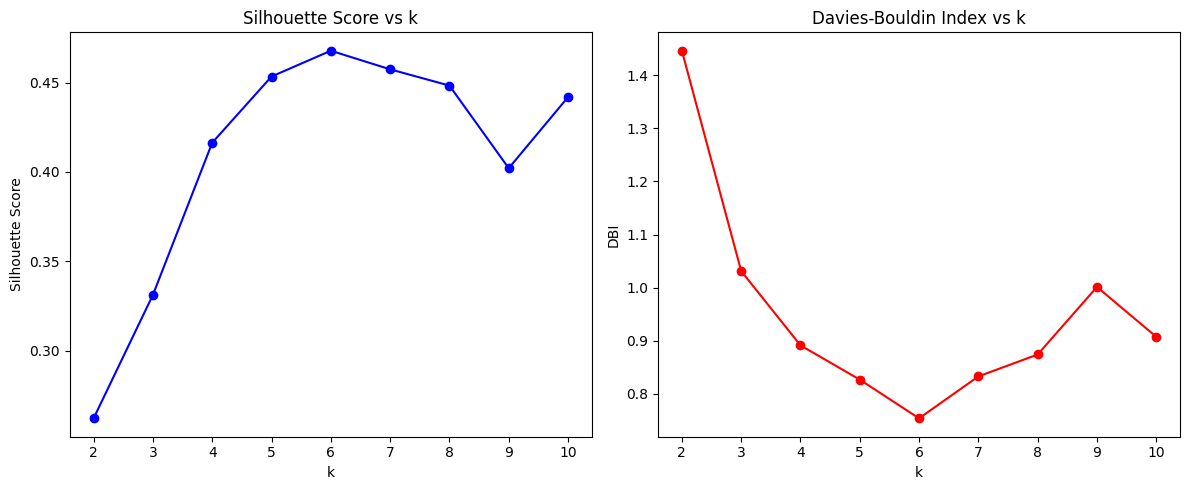

In [211]:
k_values_ori, sil_scores_ori, dbi_scores_ori = find_optimal_k(X_ori, k_min=2, k_max=10, seed=42)

Data Standarisasi:

k=2 → Silhouette=0.3421, DBI=1.2607
k=3 → Silhouette=0.3235, DBI=1.1431
k=4 → Silhouette=0.4157, DBI=0.9308
k=5 → Silhouette=0.4314, DBI=0.8746
k=6 → Silhouette=0.4449, DBI=0.8277
k=7 → Silhouette=0.4393, DBI=0.7957
k=8 → Silhouette=0.4304, DBI=0.8224
k=9 → Silhouette=0.4385, DBI=0.8637
k=10 → Silhouette=0.4475, DBI=0.8801


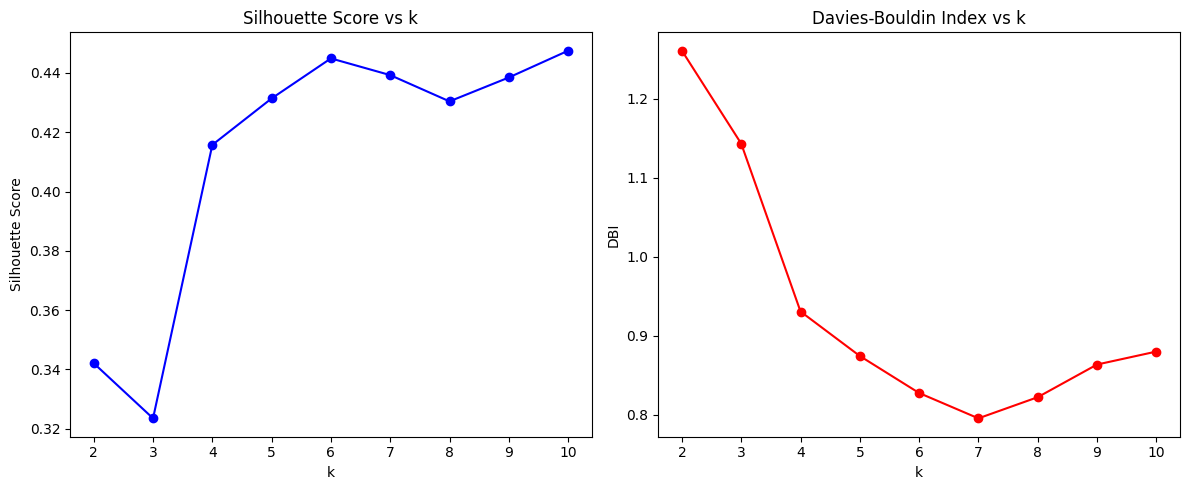

In [212]:
k_values_std, sil_scores_std, dbi_scores_std = find_optimal_k(X_std, k_min=2, k_max=10, seed=42)

Data Normalisasi:

k=2 → Silhouette=0.3716, DBI=1.1485
k=3 → Silhouette=0.3732, DBI=1.0007
k=4 → Silhouette=0.4043, DBI=0.9706
k=5 → Silhouette=0.4209, DBI=0.9361
k=6 → Silhouette=0.4406, DBI=0.8599
k=7 → Silhouette=0.4338, DBI=0.8186
k=8 → Silhouette=0.4384, DBI=0.8069
k=9 → Silhouette=0.4391, DBI=0.8755
k=10 → Silhouette=0.3847, DBI=0.9774


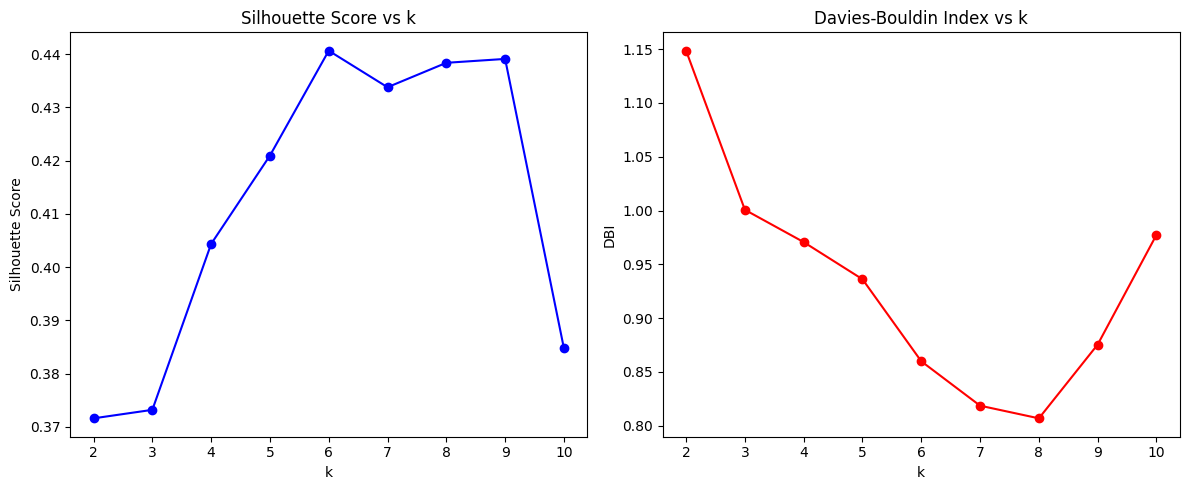

In [213]:
k_values_norm, sil_scores_norm, dbi_scores_norm = find_optimal_k(X_norm, k_min=2, k_max=10, seed=42)

Hasilnya, data asli menunjukkan silhouette score tertinggi dan davies-bouldin index terendah pada k=6, dibandingkan dengan data standarisasi dan normalisasi.

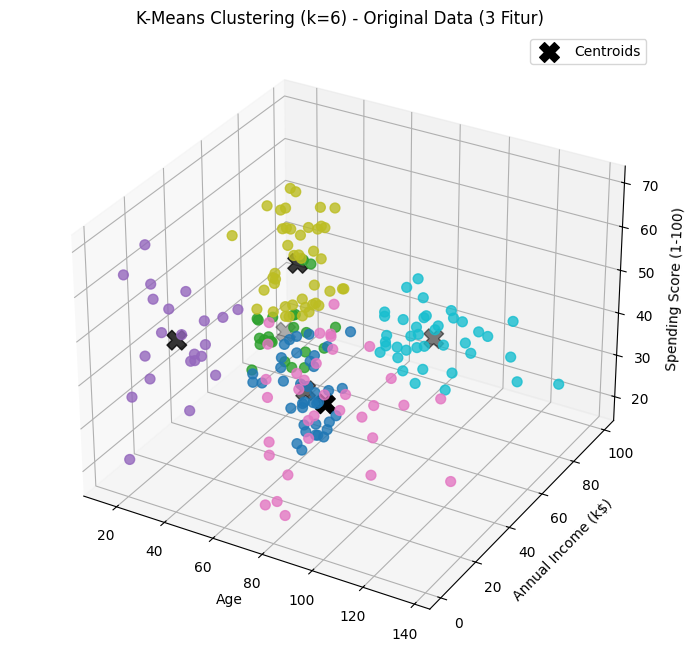

In [214]:
labels_ori_6, centroids_ori_6 = kmeans(X_ori, k=6, seed=42)

# Visualisasi 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot tiap cluster
scatter = ax.scatter(X_ori[:, 0], X_ori[:, 1], X_ori[:, 2],
                     c=labels_ori_6, cmap='tab10', s=50, alpha=0.8)

# Tampilkan centroid
ax.scatter(centroids_ori_6[:, 0], centroids_ori_6[:, 1], centroids_ori_6[:, 2],
           c='black', marker='X', s=200, label='Centroids')

# Label dan judul
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('                        K-Means Clustering (k=6) - Original Data (3 Fitur)                          ')
plt.legend()
plt.show()

### Insight dari Visualisasi Klaster (k=6, Data Asli dengan 3 Fitur)

Visualisasi 3D ini menggambarkan hasil klasterisasi berdasarkan tiga fitur utama: umur (Age), pendapatan tahunan (Annual Income), dan skor pengeluaran (Spending Score). Dengan 6 klaster yang terbentuk, terlihat pola segmentasi pelanggan yang cukup kompleks namun informatif. Berikut adalah insight yang dapat diambil:

#### 1. Klaster usia muda dengan pendapatan rendah namun pengeluaran tinggi
Terdapat satu klaster yang terdiri dari individu berusia muda dengan pendapatan tahunan relatif rendah, namun memiliki skor pengeluaran yang tinggi. Ini mengindikasikan adanya kelompok anak muda yang cenderung konsumtif meskipun tidak memiliki penghasilan besar, mungkin karena gaya hidup atau ketergantungan pada orang tua.

#### 2. Klaster usia menengah dengan pendapatan dan pengeluaran sedang
Klaster ini berisi individu yang berada pada usia menengah dengan pendapatan tahunan dan skor pengeluaran yang tidak terlalu ekstrem. Kelompok ini menunjukkan pola konsumsi yang stabil dan moderat, cocok menjadi target untuk penawaran umum atau program loyalitas.

#### 3. Klaster usia tua dengan pendapatan tinggi dan pengeluaran rendah
Kelompok ini cenderung terdiri dari konsumen yang lebih tua, memiliki pendapatan tinggi, namun spending score rendah. Kemungkinan kelompok ini bersifat hemat atau selektif dalam pengeluaran, cocok untuk pendekatan pemasaran berbasis nilai atau manfaat jangka panjang.

#### 4. Klaster usia tua dengan pengeluaran tinggi
Menariknya, ada juga klaster yang berisi pelanggan usia lebih tua namun dengan spending score tinggi. Ini menunjukkan bahwa tidak semua konsumen tua bersifat hemat, dan masih ada segmen lansia yang aktif dalam berbelanja, mungkin karena kebutuhan gaya hidup atau kebebasan finansial.

#### 5. Klaster dengan pendapatan menengah tinggi dan pengeluaran sangat rendah
Klaster ini berisi konsumen yang memiliki penghasilan cukup tinggi, namun sangat jarang melakukan pembelanjaan. Ini mungkin menunjukkan pelanggan pasif atau mereka yang kurang tertarik terhadap produk/jasa yang ditawarkan saat ini.

#### 6. Klaster beragam usia dengan perilaku belanja menengah
Salah satu klaster terlihat menggabungkan pelanggan dari berbagai usia dan tingkat penghasilan, namun dengan skor pengeluaran menengah. Ini bisa jadi merupakan klaster yang paling heterogen dan mewakili konsumen umum.

#### Kesimpulan:
Hasil klasterisasi ini menunjukkan bahwa perilaku belanja tidak hanya dipengaruhi oleh pendapatan, tapi juga oleh faktor usia dan mungkin preferensi atau gaya hidup. Segmentasi semacam ini sangat penting dalam merancang strategi pemasaran yang terpersonalisasi. Misalnya, kelompok muda konsumtif bisa ditarget dengan promosi intensif dan media sosial, sementara kelompok usia tua berpendapatan tinggi bisa ditawarkan produk premium berbasis kualitas.


In [215]:
df_clustered = df.copy()
df_clustered['Cluster'] = labels_ori_6
df_clustered.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2


In [216]:
df_sort3 = df_clustered.sort_values(by='Cluster')
df_sort3

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
48,49,Female,29,40,42,0
49,50,Female,31,40,42,0
51,52,Male,33,42,60,0
52,53,Female,31,43,54,0
61,62,Male,19,46,55,0
...,...,...,...,...,...,...
187,188,Male,28,101,68,5
195,196,Female,35,120,79,5
193,194,Female,38,113,91,5
197,198,Male,32,126,74,5


## Clustering dua fitur: Annual Income dan Spending Score

k=2 → Silhouette=0.3037, DBI=1.2568
k=3 → Silhouette=0.4749, DBI=0.7153
k=4 → Silhouette=0.5031, DBI=0.6974
k=5 → Silhouette=0.5646, DBI=0.5711
k=6 → Silhouette=0.5517, DBI=0.6567
k=7 → Silhouette=0.4733, DBI=0.7129
k=8 → Silhouette=0.4612, DBI=0.7042
k=9 → Silhouette=0.4376, DBI=0.9009
k=10 → Silhouette=0.4191, DBI=0.8978


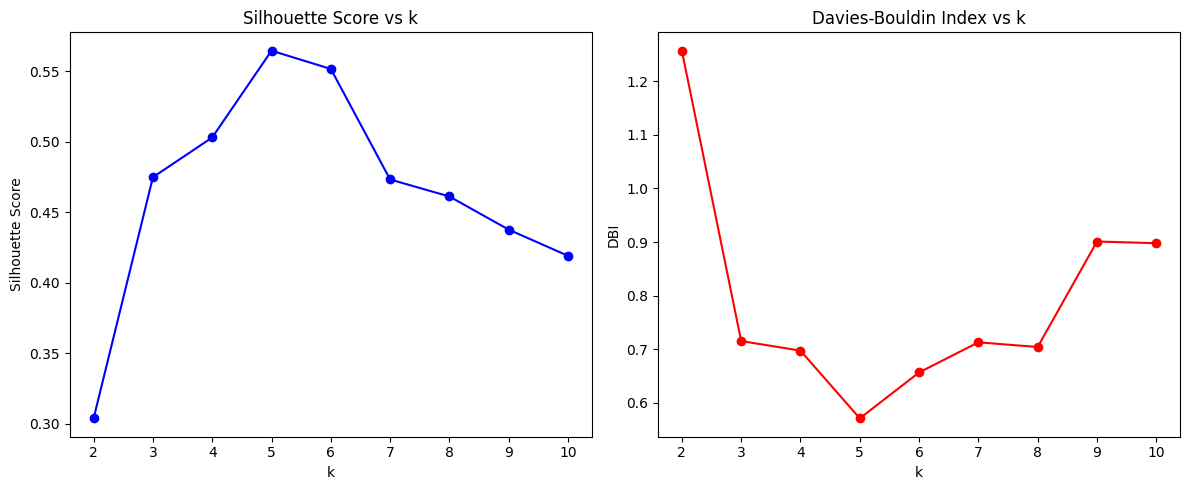

In [217]:
X_two_features = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
k_values_two, sil_scores_two, dbi_scores_two = find_optimal_k(X_two_features, k_min=2, k_max=10, seed=42)

k=2 → Silhouette=0.3002, DBI=1.2713
k=3 → Silhouette=0.4738, DBI=0.7165
k=4 → Silhouette=0.4187, DBI=0.8156
k=5 → Silhouette=0.5654, DBI=0.5708
k=6 → Silhouette=0.5518, DBI=0.6589
k=7 → Silhouette=0.4722, DBI=0.7129
k=8 → Silhouette=0.4605, DBI=0.7053
k=9 → Silhouette=0.4503, DBI=0.7246
k=10 → Silhouette=0.4349, DBI=0.7334


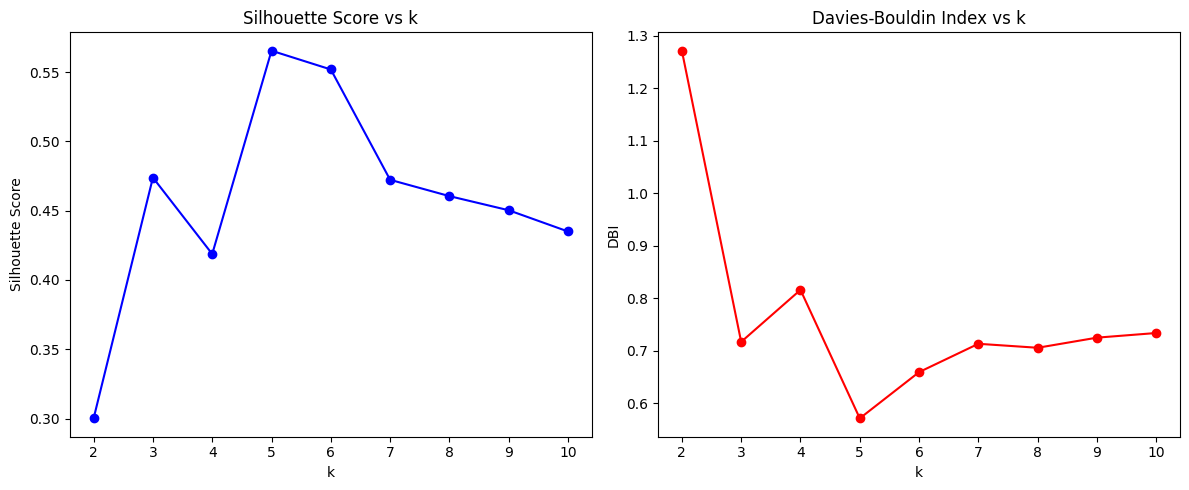

In [218]:
X_two_features_std = df_std[['Annual Income (k$)', 'Spending Score (1-100)']].values
k_values_two, sil_scores_two, dbi_scores_two = find_optimal_k(X_two_features_std, k_min=2, k_max=10, seed=42)

Hasilnya, silhouette score tertinggi dan davies-bouldin index terendah pada k=5

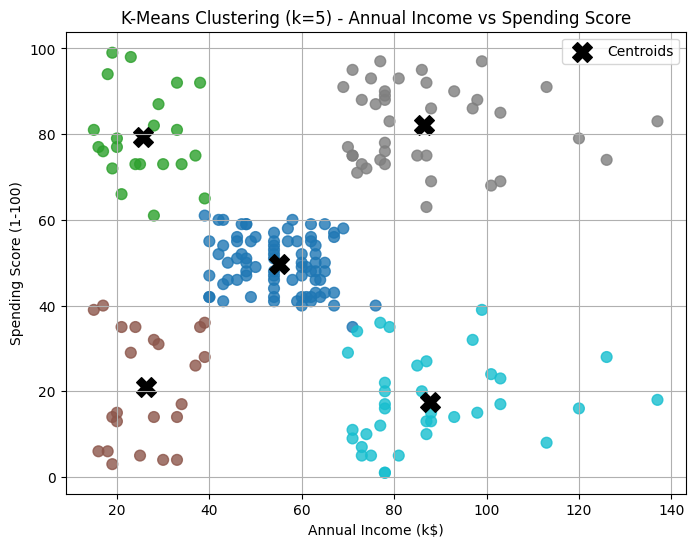

In [219]:
labels_two_5, centroids_two_5 = kmeans(X_two_features, k=5, seed=42)

# Visualisasi scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_two_features[:, 0], X_two_features[:, 1],
            c=labels_two_5, cmap='tab10', s=60, alpha=0.8)

# Tambahkan centroid
plt.scatter(centroids_two_5[:, 0], centroids_two_5[:, 1],
            c='black', marker='X', s=200, label='Centroids')

# Label dan judul
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering (k=5) - Annual Income vs Spending Score')
plt.legend()
plt.grid(True)
plt.show()

### Insight dari Visualisasi Klaster (k=5)

Hasil klasterisasi pada fitur Annual Income vs Spending Score menghasilkan temuan yang cukup menarik dan memberikan gambaran segmentasi konsumen yang jelas, meskipun hubungan antara pendapatan dan pengeluaran tidak linear. Beberapa pola penting yang dapat diamati:

1. **Pendapatan Rendah** (sekitar 15–40 ribu dolar):

Terdapat dua klaster yang kontras:
- Klaster 1: Konsumen dengan spending score rendah (sekitar 0–40), mengindikasikan frekuensi atau intensitas belanja yang rendah.
- Klaster 2: Konsumen dengan spending score tinggi (sekitar 60–100), menunjukkan kelompok yang berbelanja secara aktif meskipun memiliki pendapatan rendah.

Tidak ditemukan klaster dengan spending score menengah pada segmen ini. Hal ini mengindikasikan perilaku belanja yang cenderung ekstrem pada kelompok berpendapatan rendah.

2. **Pendapatan Menengah** (sekitar 40–70 ribu dolar):

- Klaster 3: Seluruh konsumen dalam segmen ini terkonsentrasi dalam satu klaster, dengan spending score menengah (sekitar 40–60). Ini mengisyaratkan bahwa kelompok berpendapatan menengah memiliki perilaku belanja yang lebih moderat dan homogen.

3. **Pendapatan Tinggi** (sekitar 70–140 ribu dolar):

Terbentuk dua klaster berbeda:
- Klaster 4: Klaster dengan spending score rendah (sekitar 0–40), mengindikasikan adanya konsumen berpendapatan tinggi namun cenderung tidak menghabiskan banyak untuk konsumsi.
- Klaster 5: Klaster dengan spending score tinggi (sekitar 60–100), menunjukkan kelompok affluent spender.

Seperti pada segmen pendapatan rendah, tidak ada klaster dengan spending score menengah, sehingga perilaku belanja konsumen berpendapatan tinggi juga tampak terbagi secara ekstrem.

#### Kesimpulan:

Distribusi klaster menunjukkan bahwa baik konsumen dengan pendapatan rendah maupun tinggi memiliki perilaku belanja yang bervariasi (tinggi atau rendah), sementara konsumen dengan pendapatan menengah cenderung memiliki perilaku belanja yang seragam dan moderat. Hal ini bisa menjadi dasar segmentasi pemasaran yang lebih tepat sasaran, misalnya dengan menawarkan promosi intensif pada kelompok spender aktif, dan pendekatan personal untuk kelompok spender pasif.


In [220]:
df_clustered_two = df.copy()
df_clustered_two['Cluster'] = labels_two_5
df_clustered_two.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2


In [221]:
df_sort = df_clustered_two.sort_values(by='Cluster')
df_sort

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
48,49,Female,29,40,42,0
49,50,Female,31,40,42,0
50,51,Female,49,42,52,0
51,52,Male,33,42,60,0
52,53,Female,31,43,54,0
...,...,...,...,...,...,...
186,187,Female,54,101,24,4
194,195,Female,47,120,16,4
192,193,Male,33,113,8,4
196,197,Female,45,126,28,4


# Evaluasi

In [222]:
sil_three = silhouette_score(X_ori, labels_ori_6)
dbi_three = davies_bouldin_index(X_ori, labels_ori_6, centroids_ori_6)

print(f"3 Fitur: Age, Annual Income (k$) dan Spending Score (1-100)")
print(f"Silhouette Score: {round(sil_three, 4)}")
print(f"Davies-Bouldin Index: {round(dbi_three, 4)}\n")

sil_two = silhouette_score(X_two_features, labels_two_5)
dbi_two = davies_bouldin_index(X_two_features, labels_two_5, centroids_two_5)

print(f"2 Fitur: Annual Income (k$) dan Spending Score (1-100)")
print(f"Silhouette Score: {round(sil_two, 4)}")
print(f"Davies-Bouldin Index: {round(dbi_two, 4)}")


3 Fitur: Age, Annual Income (k$) dan Spending Score (1-100)
Silhouette Score: 0.4679
Davies-Bouldin Index: 0.7542

2 Fitur: Annual Income (k$) dan Spending Score (1-100)
Silhouette Score: 0.5646
Davies-Bouldin Index: 0.5711


# Kesimpulan

Beberapa eksperimen dilakukan dengan membandingkan performa clustering pada data asli (tanpa transformasi), data yang telah dinormalisasi (Min-Max Scaling), dan data yang telah distandarisasi (Z-Score). Berdasarkan hasil evaluasi:

* Untuk data asli dengan dua fitur (Annual Income dan Spending Score), nilai silhouette score dan DBI terbaik diperoleh saat k = 5, yaitu Silhouette = 0.5646 dan DBI = 0.5711. Ini menunjukkan pemisahan klaster yang baik dan kompak.

* Untuk data asli dengan tiga fitur (Age, Annual Income, Spending Score), nilai terbaik diperoleh saat k = 6, dengan Silhouette = 0.4679 dan DBI = 0.7542. Hasil ini menunjukkan bahwa penambahan fitur age memberikan dimensi baru dalam segmentasi yang tetap memberikan struktur klaster yang cukup kuat.

* Meskipun normalisasi dan standarisasi membantu mengurangi skala ketimpangan antar fitur, hasil eksperimen menunjukkan bahwa data asli memberikan performa yang lebih baik secara konsisten, terutama pada kombinasi metrik evaluasi tersebut.

Dengan demikian, dapat disimpulkan bahwa formulasi masalah dalam segmentasi pelanggan ini berhasil dijawab melalui pendekatan clustering dengan K-Means, menggunakan data asli tanpa transformasi, dengan pemilihan jumlah klaster berdasarkan kombinasi nilai Silhouette Score dan DBI terbaik. Segmentasi ini tidak hanya memberikan wawasan mendalam terhadap perilaku pelanggan, tetapi juga membuka peluang untuk merancang strategi pemasaran yang lebih terpersonalisasi dan efektif.

# *Terima kasih*